# Homework - Classification

In [28]:
#Import necessary libraries

import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge


import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data preparation

In [56]:
df_clean=df.copy()
df_clean=df_clean.fillna(0)
df_clean['rooms_per_household']=df_clean['total_rooms']/df_clean['households']
df_clean['bedrooms_per_room']=df_clean['total_bedrooms']/df_clean['total_rooms']
df_clean['rooms_per_household']=df_clean['population']/df_clean['households']

## Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [57]:
df_clean['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

## Question 2
- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

<AxesSubplot:>

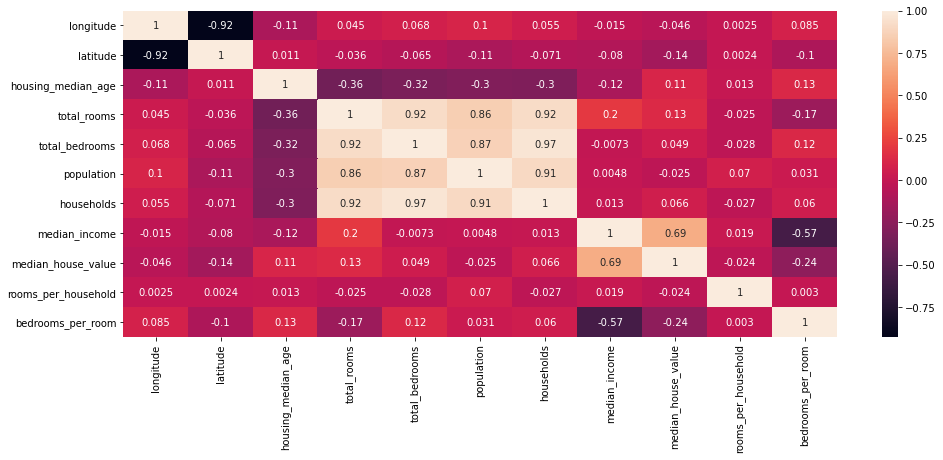

In [58]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_clean.corr(),annot=True)

total_bedrooms and households

In [59]:
#create new variable
df_clean['above_average']=df_clean['median_house_value']>df_clean['median_house_value'].mean()

In [60]:
Y_target=['above_average']
X_features=list(set(df_clean.drop(columns=['median_house_value']).columns).difference(Y_target))
#split the data
X=df_clean[X_features]
y=df_clean[Y_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) # train 60% and test 40%
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)  
#lets split test in half so validation has 20% and test 20% from the original dataset

In [61]:
X_features

['median_income',
 'population',
 'longitude',
 'rooms_per_household',
 'housing_median_age',
 'latitude',
 'bedrooms_per_room',
 'total_bedrooms',
 'households',
 'ocean_proximity',
 'total_rooms']

## Question 3
- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

In [62]:
from sklearn.metrics import mutual_info_score

mutual_info_score(X_train.ocean_proximity.values.flatten(),y_train.values.flatten())

0.10266844079906365

## Question 4
- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digit

In [63]:
from sklearn.feature_extraction import DictVectorizer

dv=DictVectorizer(sparse=False)
train_dict = X_train.to_dict(orient='records')
X_traint=dv.fit_transform(train_dict)
X_traint

array([[1.81818182e-01, 6.53000000e+02, 3.50000000e+01, ...,
        2.32924962e+00, 6.90000000e+02, 3.79500000e+03],
       [1.91666667e-01, 2.40000000e+01, 8.00000000e+00, ...,
        2.62500000e+00, 4.60000000e+01, 2.40000000e+02],
       [2.07034939e-01, 8.81000000e+02, 2.80000000e+01, ...,
        2.27922815e+00, 8.77000000e+02, 4.23600000e+03],
       ...,
       [2.70823417e-01, 5.27000000e+02, 3.60000000e+01, ...,
        3.33206831e+00, 5.69000000e+02, 2.10100000e+03],
       [1.66993007e-01, 5.59000000e+02, 1.50000000e+01, ...,
        3.17889088e+00, 5.97000000e+02, 3.57500000e+03],
       [3.11168954e-01, 1.24200000e+03, 5.20000000e+01, ...,
        2.10869565e+00, 1.31500000e+03, 4.22600000e+03]])

In [64]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_traint,y_train)
prediction=model.predict(dv.transform(X_validation.to_dict(orient='records')))


C:\Users\GABRIEL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False, False,  True, ...,  True, False,  True])

In [73]:
from sklearn.metrics import accuracy_score

Original_acc=accuracy_score(y_validation,prediction)
Original_acc

0.841327519379845

## Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?

In [77]:
np.delete(X_traint, 0, axis=1)

array([[6.53000000e+02, 3.50000000e+01, 3.41100000e+01, ...,
        2.32924962e+00, 6.90000000e+02, 3.79500000e+03],
       [2.40000000e+01, 8.00000000e+00, 3.33200000e+01, ...,
        2.62500000e+00, 4.60000000e+01, 2.40000000e+02],
       [8.81000000e+02, 2.80000000e+01, 3.87400000e+01, ...,
        2.27922815e+00, 8.77000000e+02, 4.23600000e+03],
       ...,
       [5.27000000e+02, 3.60000000e+01, 3.40300000e+01, ...,
        3.33206831e+00, 5.69000000e+02, 2.10100000e+03],
       [5.59000000e+02, 1.50000000e+01, 3.75800000e+01, ...,
        3.17889088e+00, 5.97000000e+02, 3.57500000e+03],
       [1.24200000e+03, 5.20000000e+01, 3.77700000e+01, ...,
        2.10869565e+00, 1.31500000e+03, 4.22600000e+03]])

In [78]:
resultados_df=[]
feature_names=dv.get_feature_names()
X_validationt=dv.transform(X_validation.to_dict(orient='records'))

for feature in range(X_traint.shape[1]):
    X_traint_sinf=np.delete(X_traint, feature, axis=1)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_traint_sinf,y_train)
    X_validationt_sinf=np.delete(X_validationt, feature, axis=1)
    prediction=model.predict(X_validationt_sinf)
    new_acc=accuracy_score(y_validation,prediction)
    resultados_df.append([feature_names[feature],new_acc])
resultados_df=pd.DataFrame(resultados_df,columns=['model_sin_feature','New_acc'])
resultados_df['Original_acc']=Original_acc
resultados_df['diff_acc Original-New']=resultados_df['Original_acc']-resultados_df['New_acc']
resultados_df

C:\Users\GABRIEL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\GABRIEL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GABRIEL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GABRIEL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

,model_sin_feature,New_acc,Original_acc,diff_acc Original-New
0,bedrooms_per_room,0.842781,0.841328,-0.001453
1,households,0.835756,0.841328,0.005572
2,housing_median_age,0.828004,0.841328,0.013324
3,latitude,0.837209,0.841328,0.004118
4,longitude,0.835271,0.841328,0.006056
5,median_income,0.769864,0.841328,0.071463
6,ocean_proximity=<1H OCEAN,0.842297,0.841328,-0.000969
7,ocean_proximity=INLAND,0.844477,0.841328,-0.003149
8,ocean_proximity=ISLAND,0.842781,0.841328,-0.001453
9,ocean_proximity=NEAR BAY,0.842781,0.841328,-0.001453


In [82]:
indice_menor=resultados_df['diff_acc Original-New'].abs().idxmin()
resultados_df['model_sin_feature'][indice_menor]

'total_bedrooms'

## Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [83]:
def rmse(y:np.array, y_pred:np.array)->float:
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [89]:


Y_target=['median_house_value']
X_features=list(set(df_clean.drop(columns=['above_average']).columns).difference(Y_target))
#split the data
X=df_clean[X_features]
y=df_clean[Y_target].apply(lambda x: np.log1p(x))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) # train 60% and test 40%
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)  
#lets split test in half so validation has 20% and test 20% from the original dataset

dv=DictVectorizer(sparse=False)
train_dict = X_train.to_dict(orient='records')
X_train=dv.fit_transform(train_dict)
X_validation=dv.transform(X_validation.to_dict(orient='records'))


aplhas=[0, 0.01, 0.1, 1, 10]
resultados_lineal=[]
for alp in aplhas:
    model = Ridge(alpha=alp, solver="sag",random_state=42)
    model.fit(X_train,y_train)
    prediction=model.predict(X_validation)
    rmse_result=rmse(y_validation.values,prediction)
    resultados_lineal.append([alp,rmse_result])
resultados_lineal=pd.DataFrame(resultados_lineal,columns=['alpha','RMSE'])

In [90]:
resultados_lineal

,alpha,RMSE
0,0.00,0.54948
1,0.01,0.54948
2,0.10,0.54948
3,1.00,0.54948
4,10.00,0.54948


In [91]:
#aplha 0